In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

save_dir = './gpe_locations'
l = tf.saved_model.load(save_dir)



In [2]:
l.means

l.predict_f_compiled(np.array([[.4]],dtype=np.float64).reshape(-1,1))

(<tf.Tensor: shape=(1, 2), dtype=float64, numpy=array([[-0.14465954, -0.69350384]])>,
 <tf.Tensor: shape=(1, 2), dtype=float64, numpy=array([[0.04044521, 0.04044521]])>)

In [61]:

d=pd.to_datetime(['2020-12-26 12:43:14+00:00','2020-12-26 16:43:14+00:00'])


# @tf.function(input_signature=[tf.TensorSpec(shape=None, dtype=tf.float64)])
def decode(m,x):
    
    xx = pd.to_datetime(m.xx.numpy().astype(str)).tz_localize(None)
    
    dates = np.array((x-xx[0])/(xx[1]-xx[0])).reshape(-1,1)
    print (dates)

    
    val,err = m.predict_f_compiled( dates )
    
    val = [(i+m.means)/m.scaled for i in val]
    # 
    err *= m.scaled**2
                   
                   
    return val,err,xx,m.means,m.scaled
 
    
 
decode(l,d)

[[0.       ]
 [1.1628846]]


([<tf.Tensor: shape=(2,), dtype=float64, numpy=array([51.50457553, -0.15675984])>,
  <tf.Tensor: shape=(2,), dtype=float64, numpy=array([51.50792221, -0.13521932])>],
 <tf.Tensor: shape=(2, 2), dtype=float64, numpy=
 array([[  1779.07369073,   2627.20678917],
        [-13153.7307607 ,     58.2472735 ]])>,
 DatetimeIndex(['2020-12-26 12:43:14+00:00', '2020-12-26 16:09:37+00:00'], dtype='datetime64[ns, UTC]', freq=None),
 <tf.Variable 'means:0' shape=(2,) dtype=float64, numpy=array([ 1.86027161e+04, -8.79689237e+00])>,
 <tf.Variable 'scale:0' shape=(2,) dtype=float64, numpy=array([361.18570063,  56.11632732])>)

In [78]:
df = pd.read_csv('data.csv')


In [79]:
xx = pd.to_datetime(l.xx.numpy().astype(str)).tz_localize(None)
x  = pd.to_datetime(df.DATE)
dates = np.array((x-xx[0])/(xx[1]-xx[0])).reshape(-1,1)


In [58]:
val,err = l.predict_f_compiled( dates )

val = np.array([(i+l.means)/l.scaled for i in val])
    # 
err = np.array(err) / l.scaled**2
                   


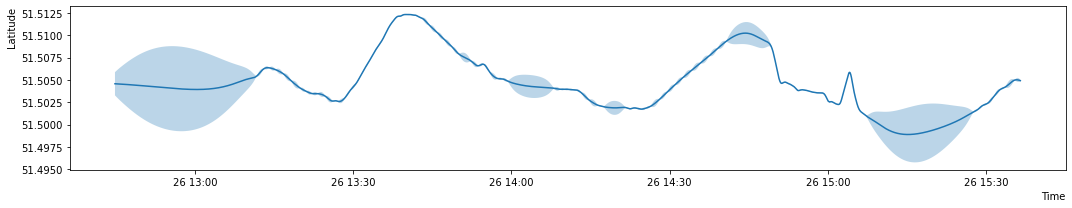

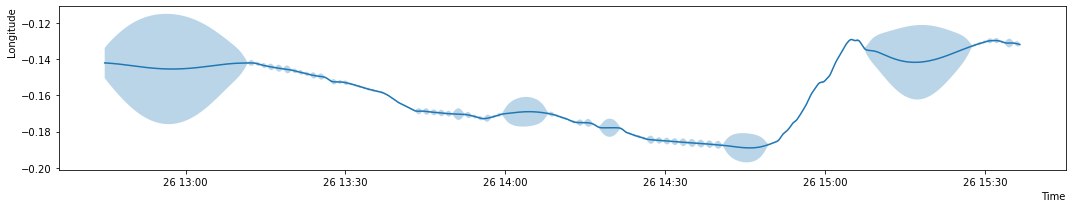

In [62]:

import matplotlib.pyplot as plt



for z in [0,1]: 
    plt.figure(figsize=(15,3))

    _ = plt.plot(x,val[:,z], "-", mew=.0005)

    
    top = val[:,z] + 1.96 * err[:,z]**0.5
    bot = val[:,z] - 1.96 * err[:,z]**0.5
    
#     plt.plot(pX, top, "-", mew=.005)
    plt.fill_between(x, np.array(top), np.array(bot), alpha=0.3)
    


    plt.xlabel('Time', horizontalalignment='right', x=1.0)
    plt.ylabel(['Latitude','Longitude'][z], horizontalalignment='right', y=1.0)
    plt.tight_layout()

In [80]:

df.LAT = val[:,0]
df.LON = val[:,1]
df['err_LAT'] = 1.96 * err[:,0]**0.5
df['err_LON'] = 1.96 * err[:,1]**0.5
df.to_csv('./data_corrected.csv',index=False)

<AxesSubplot:xlabel='LON', ylabel='LAT'>

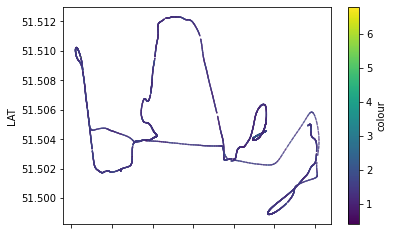

In [101]:
what = 'PM3'
df['colour'] = df[what]**.3
df.plot(x='LON',y='LAT',c='colour',kind='scatter',s=.1,cmap='viridis')

<AxesSubplot:>

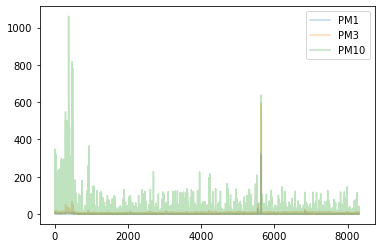

In [104]:
df[['PM1','PM3','PM10']].plot(alpha=.3)